In [1]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import lognorm, norm

Parameters are taken from https://github.com/BDI-pathogens/OpenABM-Covid19/blob/master/documentation/parameters/parameter_dictionary.md

Mean length of the infectiousness period are 5.5 days with a standard deviation of 2.14

In [2]:
mean = 5.5
std = 2.14

/home/klara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.9999999999999999

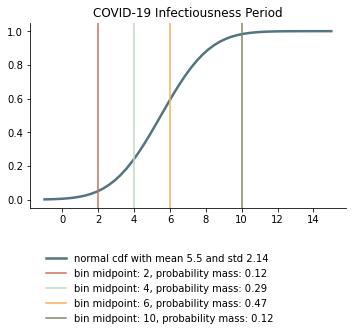

In [3]:
xs = np.linspace(-1, 15)
cdf_func = partial(norm.cdf, loc=mean, scale=std)
cdf_ys = cdf_func(x=xs)


def midpoint_with_p_mass(upper, lower=None, color="blue"):
    old_cdf = 0 if lower is None else cdf_func(lower)
    # do not move because cdf_func(5) could be > 0!
    lower = 0 if lower is None else lower
    prob_mass = round(cdf_func(upper) - old_cdf, 2)
    midpoint = round(0.5 * (upper + lower))
    label = f"bin midpoint: {midpoint}, probability mass: {prob_mass}"
    plt.axvline(midpoint, label=label, color=color)
    return prob_mass


fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(
    xs,
    cdf_ys,
    label=f"normal cdf with mean {mean} and std {std}",
    color="#547482",
    linewidth=2.5,
)
p1 = midpoint_with_p_mass(3, None, color="#C87259")
p2 = midpoint_with_p_mass(5, 3, color="#C2D8C2")
p3 = midpoint_with_p_mass(8, 5, color="#F1B05D")
p4 = midpoint_with_p_mass(12, 8, color="#818662")
lgd = plt.legend(frameon=False, bbox_to_anchor=(0.8, -0.2))
plt.title("COVID-19 Infectiousness Period")
sns.despine()
plt.tight_layout()
plt.savefig("infectiousness_period.png", bbox_inches="tight", bbox_extra_artists=(lgd,))

p1 + p2 + p3 + p4

In [4]:
dist_mean = 2 * 0.12 + 4 * 0.29 + 6 * 0.47 + 10 * 0.12
dist_var = 2**2 * 0.12 + 4**2 * 0.29 + 6**2 * 0.47 + 10**2 * 0.12 - dist_mean**2
dist_std = np.sqrt(dist_var)
dist_mean, dist_std

(5.42, 2.159536987411885)